<a href="https://colab.research.google.com/github/ganesh-207/Artificial-Intelligence/blob/main/Regression_With_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Use case: Build an ANN model that predicts the Power Energy for Powerplant based data. Independent features: sensor readings related to powerplant machines

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv(r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/PowerPlant.csv')
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


AT: Atmospheric Temperature V: Vaccum AP: Atmospheric Pressure RH: Relative Humidity PE: Power Energy

## Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
df.isna().sum()

,0
AT,0
V,0
AP,0
RH,0
PE,0


In [5]:
df.duplicated().sum()

np.int64(41)

In [6]:
df = df.drop_duplicates()

## Separate data into X and Y features

In [7]:
X = df.drop(columns=['PE'])
Y = df[['PE']]

In [8]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [9]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


## Data Preprocessing and Data cleaning

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [11]:
num_pipe = make_pipeline(SimpleImputer(),StandardScaler()).set_output(transform='pandas')

In [12]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


## Train test split

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.85,random_state=21)

In [14]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(8097, 4) (1430, 4) (8097, 1) (1430, 1)


## Artificial Neural Network Model Building

In [15]:
from keras.models import Sequential
from keras.layers import Input,Dense

In [16]:
xtrain.shape

(8097, 4)

In [17]:
xtrain.shape[1]

4

In [18]:
model = Sequential()

# Add The Input Layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add The Hidden Layers1
model.add(Dense(units=8,activation='relu'))

# Add The Hidden Layers2
model.add(Dense(units=4,activation='relu'))

# Add The Output Layer
model.add(Dense(units=1,activation='linear'))


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [21]:
nn = model.fit(xtrain,ytrain,validation_split=0.2,epochs=40)

Epoch 1/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 207153.3906 - mae: 454.8181 - val_loss: 206689.4375 - val_mae: 454.3129
Epoch 2/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 205718.2500 - mae: 453.2325 - val_loss: 203482.0938 - val_mae: 450.7538
Epoch 3/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 201490.3125 - mae: 448.5164 - val_loss: 193659.1562 - val_mae: 439.6317
Epoch 4/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 188423.9375 - mae: 433.5182 - val_loss: 173395.7344 - val_mae: 415.4508
Epoch 5/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 165639.8281 - mae: 405.5760 - val_loss: 143362.3594 - val_mae: 375.8361
Epoch 6/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 133768.5938 - mae: 361.7251 - val_loss: 109312.2891 - val_mae: 323.2145
Epoch 7/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 100231.8906 - mae: 306.8591 - val_loss: 78009.1172 - val_mae: 263.9572
Epoch 8/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 70641.5469 - mae:

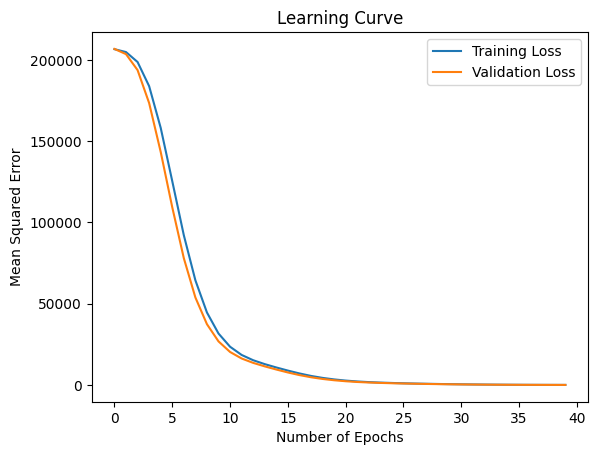

In [22]:
# Plot the learning curve
import matplotlib.pyplot as plt
plt.plot(nn.history['loss'],label='Training Loss')
plt.plot(nn.history['val_loss'],label='Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Learning Curve')
plt.show()

In [23]:
model.evaluate(xtrain,ytrain)

254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 49.7795 - mae: 4.7489


[50.75028610229492, 4.785345554351807]

In [25]:
model.evaluate(xtest,ytest)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 59.1525 - mae: 4.9407


[51.210933685302734, 4.823531627655029]

In [27]:
ypred_train = model.predict(xtrain)

254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [26]:
ypred_test = model.predict(xtest)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse = mean_squared_error(ytrain,ypred_train)
mae = mean_absolute_error(ytrain,ypred_train)
r2 = r2_score(ytrain,ypred_train)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

Mean Squared Error: 50.75027847290039
Mean Absolute Error: 4.785346031188965
R2 Score: 0.8245809078216553


In [29]:
mse1 = mean_squared_error(ytest,ypred_test)
mae1 = mean_absolute_error(ytest,ypred_test)
r21 = r2_score(ytest,ypred_test)

print(f"Mean Squared Error: {mse1}")
print(f"Mean Absolute Error: {mse1}")
print(f"R2 Score: {r21}")

Mean Squared Error: 51.210914611816406
Mean Absolute Error: 51.210914611816406
R2 Score: 0.826858401298523


## Save the model

In [30]:
model.save('PEPredictions.keras')

In [32]:
from keras.models import load_model
m = load_model('/content/PEPredictions.keras')
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245 (984.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 164 (660.00 B)

## Generate out of sample predictions

In [33]:
xnew = pd.read_csv(r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/PowerPlantTest.csv')
xnew

,AT,V,AP,RH
0,25,51.5,1000.1,57.0
1,32,41.0,1051.1,80.0
2,28,NaN,1010.2,NaN


In [34]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.717594,-0.220203,-2.211551,-1.118316
1,1.657948,-1.047911,6.373998,0.456299
2,1.120603,0.000000,-0.511275,0.000000


In [35]:
PE_preds = m.predict(xnew_pre)
PE_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


array([[441.2581 ],
       [536.00726],
       [436.45828]], dtype=float32)

In [36]:
xnew

,AT,V,AP,RH
0,25,51.5,1000.1,57.0
1,32,41.0,1051.1,80.0
2,28,NaN,1010.2,NaN


In [37]:
xnew['PE predictions'] = PE_preds.round()

In [38]:
xnew

,AT,V,AP,RH,PE predictions
0,25,51.5,1000.1,57.0,441.0
1,32,41.0,1051.1,80.0,536.0
2,28,NaN,1010.2,NaN,436.0


In [39]:
xnew['PE predictions'] = xnew['PE predictions'].astype(int).round(2)

In [40]:
xnew.to_csv('Prediction_Results_Updated.csv',index=False)